<a href="https://colab.research.google.com/github/tuomaseerola/audio/blob/master/audio_analysis_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music and Science – Audio Analysis Tutorial 

[Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), Durham University, Music Department, 2022.

Audio examples adapted from the [FMP Notebooks](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html) by Meinhard Müller, which are part of [Fundamentals of Music Processing](https://www.audiolabs-erlangen.de/fau/professor/mueller/bookFMP).


## 0 Set-up the system

In [120]:
#PROMPT: Press the play button to set up the technical system (import libraries etc.)
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import platform
print(platform.python_version())
print(matplotlib.__version__)
print(np.__version__)
print(librosa.__version__)

3.7.7
3.2.2
1.21.6
0.8.1


# 1. Read audio files

Here are a few audio files that come with Librosa. We can use any of them in the subsequent sections. Just remove the hashtag (#) in front of the line to get that audio file.

The following code also shows how to select only a _segment_ of an audio file. This is done by keywords `offset` and `duration`. Offset specifies where you want to start the segment (in seconds) and duration (also in seconds) is self-explanatory.

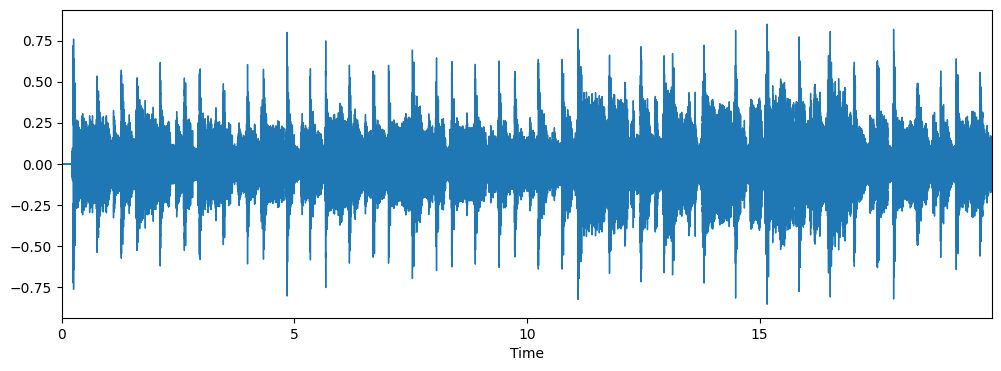

In [6]:
#filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording
#filename = librosa.ex('brahms')    # Hungarian Dance #5
#filename = librosa.ex('choice')    # A short drum and bass loop
filename = librosa.ex('fishin')     # Karissa Hobbs - Let’s Go Fishin’ A folk/pop song with verse/chorus/verse structure and vocals
#filename = librosa.ex('nutcracker')# Tchaikovsky - Dance of the Sugar Plum Fairy
#filename = librosa.ex('vibeace')   # 60-second clip
x, sr = librosa.load(filename, duration=20) # if you want to start the segment from a specific point, add offset = [2 for example] in the command

plt.figure(figsize=(12, 4))                  # create figure
librosa.display.waveplot(y = x,sr = sr)      # plot waveform
ipd.display(ipd.Audio(data = x, rate = sr))  # create playback object

---
### Learning Task 1
---
Try out some of the audio examples yourself. To select one, remove the hashtag (#) from the beginning of the line. NB. Only one audio example should be run at a time, so make sure that the rest of the 'filename' commands have a # in front of them.

## 1.1 Load audio files from online sources
This is how to load example sound files from Github pages (or anywhere from online, if you know the URL).

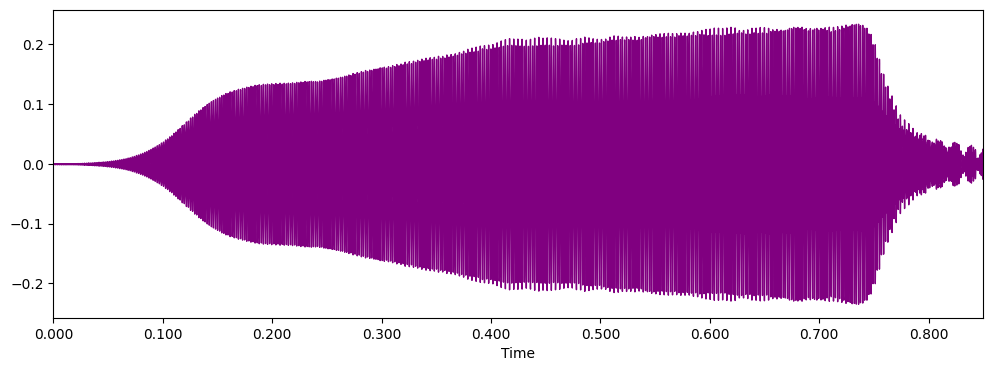

In [121]:
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/clar_one_note.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/trumpet_one_note.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/harp_one_note.wav"
#url = "https://raw.githubusercontent.com/tuomaseerola/audio/master/harpsichord_one_note.wav"

Y, samplerate = sf.read(io.BytesIO(urlopen(url).read()))

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y=Y,sr=samplerate,max_sr=100,color='purple')
ipd.display(ipd.Audio(data=Y, rate=samplerate))

## 1.2 Load audio files from your hardrive / google drive
It is also possible to load any audio you have on your hard drive to the workspace of the notebook by clicking the folder icon (on the left) and choosing the file, waiting for the file to upload, and then referring to the file. These audio files will **NOT be saved** across the sessions unless you connect your google drive with Colab, which is easy (see [External data: Local Files, Drive, Sheets and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb)).   

In [11]:
Y, sr = librosa.load('my_own_recording.wav') # if you want to start the segment from a specific point, add offset = [2 for example] in the command
plt.figure(figsize=(12, 4))
ipd.display(ipd.Audio(data=Y, rate=sr))

/Users/tuomaseerola/PycharmProjects/music_and_science_seminar/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'my_own_recording.wav'

# 2. Explore some acoustic features across time
First extract RMS (Root Mean Square) energy and convert this into decibels. 

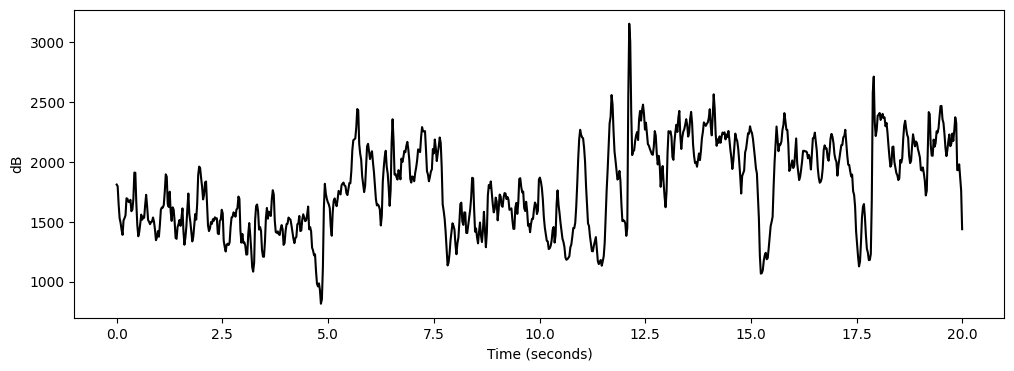

In [123]:
filename = librosa.ex('brahms') #PROMPT: Plot the loudness for nutcracker and brahms excerpts. Which one has more dynamic changes?
x, sr = librosa.load(filename, duration = 20, offset=2)
ipd.display(ipd.Audio(data=x, rate=sr))

rms = librosa.feature.rms(y=x)                  # Extract dynamics (RMS)
feat = librosa.amplitude_to_db(rms,ref=np.max)  # Convert into dB. Note that this is a relative measure (loudest is now 0)
#feat = librosa.feature.spectral_centroid(x)     # calculate spectral centroid
times = librosa.times_like(feat)                # Create X-axis for time in seconds

plt.figure(figsize=(12, 4))
plt.plot(times, feat[0], color='black')
plt.xlabel('Time (seconds)')
plt.ylabel('dB')
plt.show()

---
### Learning Task 2
---
There is another feature called _spectral centroid_ that is often used as a proxy for perceptual brightness that you could visualise across time. Calculation of this is very simple and shown above (commented out). You could explore it or some other features from [spectral features](https://librosa.org/doc/latest/feature.html). Note that the labelling of the Y axis needs to be fixed.

# 3. Analyse pitch
This is best done with a monophonic example, although librosa has algorithm to track all pitches as well. Here we extract the fundamental frequency of the trumpet solo using a probabilistic variant of the so-called YIN method. The variant is by Mauch and Dixon (2014) and the original technique was proposed by De Cheveigne and Kawahara (2002).

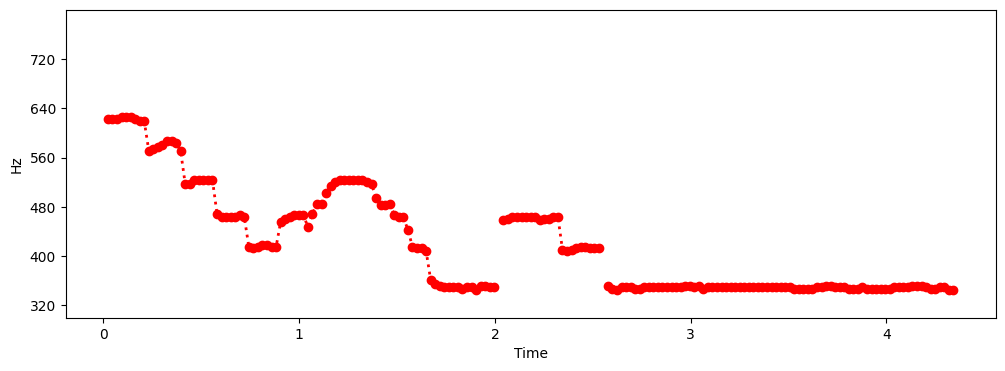

In [20]:
filename = librosa.ex('trumpet')   # Mihai Sorohan - Monophonic trumpet recording  #PROMPT: Run this code with the trumpet recording 
x, sr = librosa.load(filename)
ipd.display(ipd.Audio(data=x, rate=sr))    # code added to hear audio file

# This is where the pyin algorithm is applied. fmin refers to the lower frequency threshold and fmax to higher frequence threshold.
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C6'))
times = librosa.times_like(f0)

# Plot the fundamental frequency
plt.figure(figsize=(12, 4))
plt.plot(times,f0,'ro:', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Hz')
ax=plt.gca()
ax.yaxis.set_major_formatter(librosa.display.LogHzFormatter())
ax.set(yticks=[320,320+80,320+80*2,320+80*3,320+80*4,320+80*5])
ax.set(ylim=[300, 800])
ax.yaxis.set_major_formatter(librosa.display.LogHzFormatter())



# 4. Analyse Spectrum / Spectrogram

Spectrum is a useful representation of audio. Try out plotting the spectrogram with two different audio files from the available ones listed in Section 1.2 (trumpet sound vs example1d).



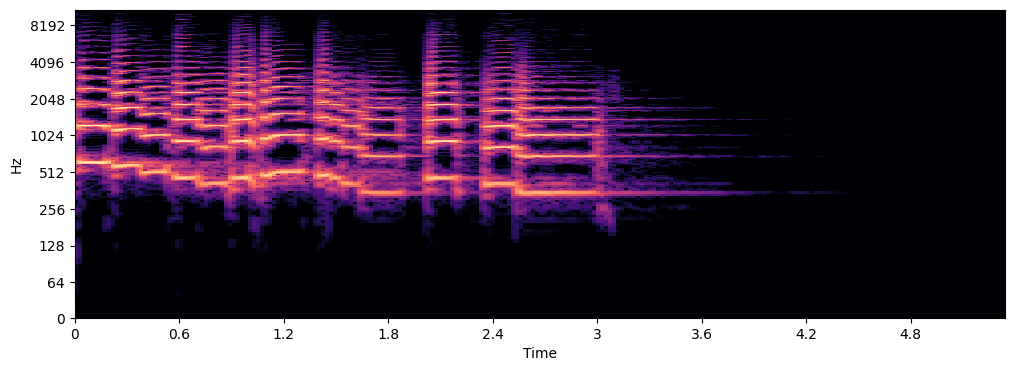

In [25]:
filename = librosa.ex('trumpet') #PROMPT: Try this out with the trumpet audio example. What is the spectrogram telling you?

import librosa.display
import matplotlib.pyplot as plt

#url = "https://raw.githubusercontent.com/annaliesemg/audio/master/example1d.wav" #PROMPT: Try out this other example. Which frequencies are the most prominent (lower ones or higher ones)?
#x, samplerate = sf.read(io.BytesIO(urlopen(url).read()))

x, sr = librosa.load(filename)  #for the example1d file, put a # in front of this line of code

#Nfft = 512
stft = np.abs(librosa.stft(x))
freqs = librosa.fft_frequencies(sr=sr)

ipd.display(ipd.Audio(data=x, rate=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), x_axis='time', y_axis='log')

In [32]:
## PROMPT: Look at the trumpet sound again. Take only the last note. Which frequency has the highest amplitude?
filename = librosa.ex('trumpet')                         # Mihai Sorohan - Monophonic trumpet recording
x, sr = librosa.load(filename,offset=2.6,duration=0.75)  # Take the last note (from 2.6 to 3.35 seconds)
ipd.display(ipd.Audio(data=x, rate=sr))                  # Create the playback option

stft = np.abs(librosa.stft(x))                           # Short-term Fourier transform to get the frequencies
# Estimate fundamental frequency using an algoritm (pyin)
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f=np.nanmedian(f0)                                       # Get the Hz of the fundamental frequency for nice labels
n=librosa.hz_to_note(f)                                  # Convert Hz to note name
print('Fundamental is', round(f,1),'Hz which is', n )


Fundamental is 349.2 Hz which is F4


Now display the spectrum of one note.

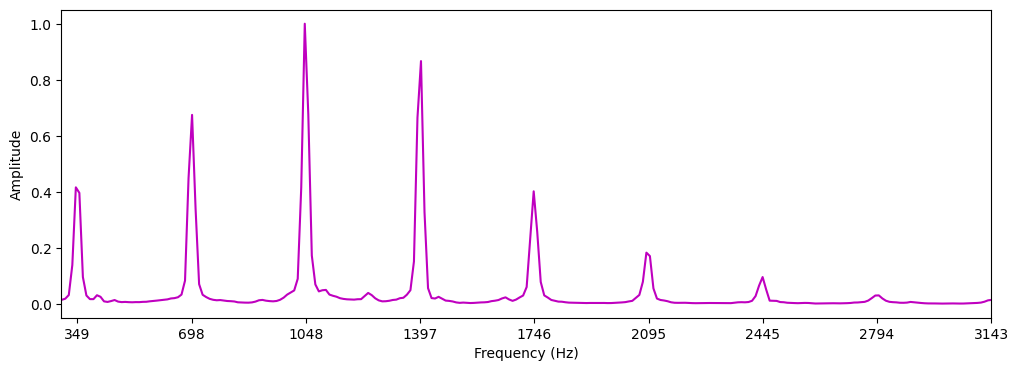

In [34]:
plt.figure(figsize=(12, 4))
# collapse across time and plot a spectrum representation (energy across frequencies)
Dmean = stft.mean(axis=1)/max(stft.mean(axis=1))
plt.plot(freqs,Dmean,color='m')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([300, 2000])             # Constrain X-axis (Hz)
x=np.arange(f,f*10,f)             # Put labels to the multiples of the fundamental
plt.xticks(x);
plt.show()

# 5. Extract onsets
This estimates the strength of possible onsets and then detects the onsets that are stronger than a threshold defined in the algorithm. There is also a beat tracking that uses the onsets to estimate beat in the music.

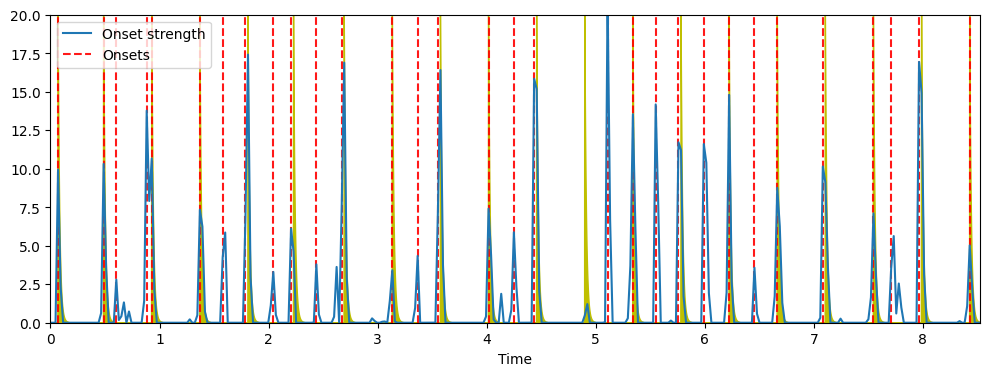

In [64]:
## PROMPT: Look at the "Choice" example. Take the first 20 seconds (as duration). Afterwards, have a look at the 'brahms' example as well.
filename = librosa.ex('choice')
x, sr = librosa.load(filename, duration=10)

o_env = librosa.onset.onset_strength(x, sr=sr,aggregate=np.median)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

plt.figure(figsize=(12, 4))
plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
plt.legend()

# Sonify the detected beat events
tempo, beats = librosa.beat.beat_track(y=x, sr=sr,trim=True,onset_envelope=o_env,tightness=150)
y_beats = librosa.clicks(frames=beats, sr=sr)

combined = (x[0:len(y_beats)]+y_beats)/2
librosa.display.waveplot(y=abs(y_beats)*max(o_env),sr=sr,color='y')
plt.ylim([0,20])
plt.legend()
plt.show()
ipd.display(ipd.Audio(data=combined, rate=sr))

---
### Learning Task 3
---
Find **tempo** of the extract in Beats Per Minute (BPM). 
*Tip. There is a command called* `beat.tempo` *that can be used to calculate the tempo.*

In [79]:
## PROMPT:Calculate the approximate tempo of the brahms audio example.

tempo = librosa.beat.tempo(x,aggregate=np.median)
print(np.round(tempo,1),'BPM')


[136.] BPM


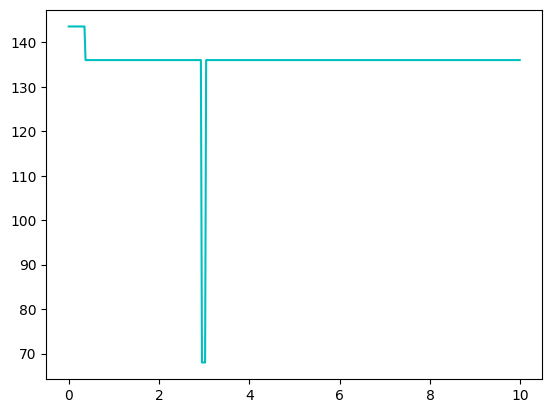

In [114]:
import matplotlib.pyplot as plt
dtempo = librosa.beat.tempo(y=x, sr=sr,aggregate=None, start_bpm=120,std_bpm=1)

fig, ax = plt.subplots()
ax.plot(librosa.times_like(dtempo), dtempo,color='c', linewidth=1.5, label='Tempo estimate (default prior)')

plt.show()
